In [19]:
import os
import sys
import csv

import pandas as pd
import numpy as np

from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
# load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('../models/Bio_ClinicalBERT/')

In [3]:
ls ../data/

200_manual_annotations_csv/
200_test_set/
200_test_set_app0_nwords125_clinical_bert_application_set_AR.txt
200_training_set/
labels_to_xmlfiles_to_drugs.txt.gz
matched-on-text-strings/
meddra_llt_pt_map.txt
ref0_nwords125_clinical_bert_reference_set_AR.txt
ref0_nwords125_clinical_bert_reference_set_BW.txt
ref0_nwords15_clinical_bert_reference_set_AR.txt
ref0_nwords250_clinical_bert_reference_set_AR.txt
ref0_nwords30_clinical_bert_reference_set_AR.txt
ref0_nwords3_clinical_bert_reference_set_AR.txt
ref0_nwords60_clinical_bert_reference_set_AR.txt
ref0_nwords6_clinical_bert_reference_set_AR.txt
ref1_nwords30_clinical_bert_reference_set_AR.txt
ref2_nwords30_clinical_bert_reference_set_AR.txt
ref3_nwords30_clinical_bert_reference_set_AR.txt
ref4_nwords30_clinical_bert_reference_set_AR.txt
ref5_nwords30_clinical_bert_reference_set_AR.txt


In [61]:
max_length = 256
reffiles = [
    '../data/ref0_nwords6_clinical_bert_reference_set_AR.txt',
    '../data/ref0_nwords15_clinical_bert_reference_set_AR.txt',
    '../data/ref0_nwords30_clinical_bert_reference_set_AR.txt',
    '../data/ref0_nwords60_clinical_bert_reference_set_AR.txt',
    '../data/ref0_nwords125_clinical_bert_reference_set_AR.txt',
    '../data/ref0_nwords250_clinical_bert_reference_set_AR.txt'
]

In [62]:
dfs = [pd.read_csv(reffile) for reffile in reffiles]
dfs[0].head()

,drug,llt_id,llt,class,string
0,ACTEMRA,10079454,systemic juvenile idiopathic arthritis,not_event,systemic juvenile idiopathic arthritis in EVEN...
1,ACTEMRA,10081111,lithiasis,not_event,lithiasis disorders: nephro EVENT endocrine di...
2,ACTEMRA,10079453,sjia,not_event,sjia ra and EVENT patients [
3,ACTEMRA,10079453,sjia,not_event,sjia ra and EVENT patients [see
4,ACTEMRA,10079453,sjia,not_event,sjia patients with EVENT 2 to


In [63]:
reffile_counts = dict()

for i, reffile in enumerate(reffiles):
    counts = list()
    sampled_df = dfs[i].sample(n=10000, random_state=2)
    for i, text in tqdm(enumerate(sampled_df['string'])):
        tokens = tokenizer(text, padding='max_length', max_length=max_length, truncation=True, return_tensors='pt')
        nwords = len(text.split())
        ntokens = (tokens['input_ids'].numpy()!=0).sum()
        counts.append( (nwords, ntokens) )
        
        if nwords > 500:
            print(reffile, sampled_df.iloc[i])
    
    reffile_counts[reffile] = counts

10000it [00:01, 5172.28it/s]
10000it [00:02, 4516.81it/s]
10000it [00:02, 3865.98it/s]
10000it [00:03, 3113.73it/s]
10000it [00:04, 2261.07it/s]
10000it [00:05, 1772.94it/s]


../data/ref0_nwords6_clinical_bert_reference_set_AR.txt 3 5.8077 8 5 11.8369 34
../data/ref0_nwords15_clinical_bert_reference_set_AR.txt 3 12.4115 14 5 24.0883 66
../data/ref0_nwords30_clinical_bert_reference_set_AR.txt 3 22.8665 30 5 43.2263 128
../data/ref0_nwords60_clinical_bert_reference_set_AR.txt 3 37.4732 60 5 69.9783 239
../data/ref0_nwords125_clinical_bert_reference_set_AR.txt 3 61.0245 124 5 110.3425 256
../data/ref0_nwords250_clinical_bert_reference_set_AR.txt 3 96.0783 250 5 131.4355 256


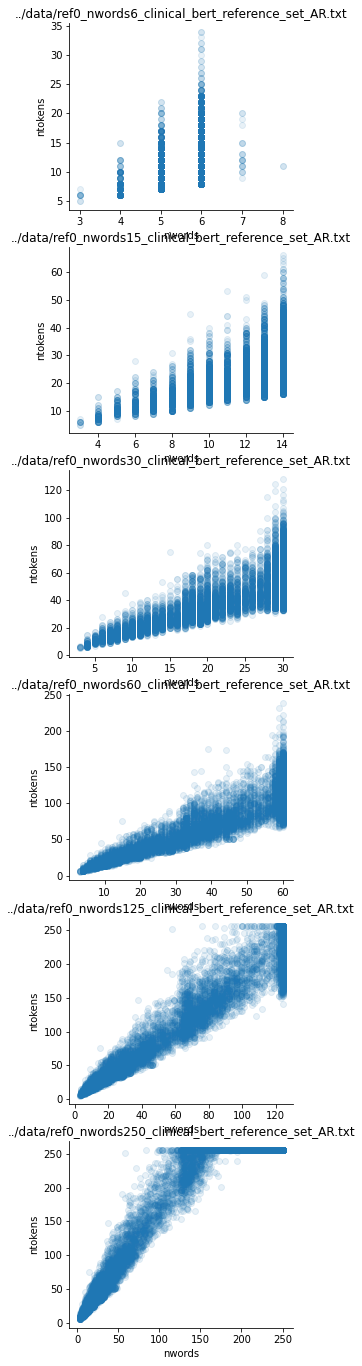

In [64]:
plt.figure(figsize=(4,4*len(reffiles)))

for i, reffile in enumerate(reffiles):
    counts = reffile_counts[reffile]
    nwords, ntokens = zip(*counts)

    plt.subplot(len(reffiles), 1, i+1)
    plt.title(reffile)
    plt.scatter(nwords, ntokens, alpha=0.1)
    plt.xlabel('nwords')
    plt.ylabel('ntokens')
    sns.despine()

    print(reffile, np.min(nwords), np.mean(nwords), np.max(nwords), np.min(ntokens), np.mean(ntokens), np.max(ntokens))